In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ROOT import TCanvas, TGraphErrors, TF1, TH1F, gStyle,TGraph,TLatex
from ROOT import gROOT
from array import array

Welcome to JupyROOT 6.16/00


In [2]:
y=[29,28,28,44,48,58,63,72,81,64,64,64,42,56,38,30,23]
x=[20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340]
ysym=[52,58,66,100,90,122,127,136,162]
xsym=[20,40,60,80,100,120,140,160,180]
sin=[0.174,0.342,0.500,0.643,0.766,0.866,0.940,0.984,1.000]
sysym=[]
ssin=[0,0,0,0,0,0,0,0,0]
data=[]
datasym=[]
for i in range(0,len(x)):
    for j in range(0,y[i]):
        data.append(x[i])
for i in range(0,len(xsym)):
    for j in range(0,ysym[i]):
        datasym.append(xsym[i])
for i in ysym:
    sysym.append(np.sqrt(i))
ndatasym=len(datasym)
ndata=len(data)

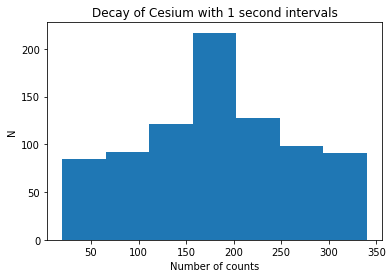

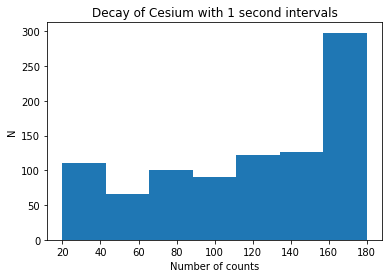

In [3]:
plt.figure()
plt.hist(data,7)
plt.ylabel("N")
plt.xlabel("Number of counts")
plt.title("Decay of Cesium with 1 second intervals")
plt.show()
plt.figure()
plt.hist(datasym,7)
plt.ylabel("N")
plt.xlabel("Number of counts")
plt.title("Decay of Cesium with 1 second intervals")
plt.show()

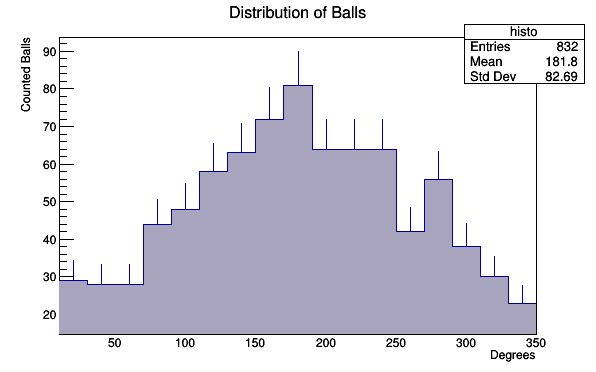

In [4]:
c1 = TCanvas( 'c1', 'Poisson Graph', 200, 10, 600, 400 ) 

histo = TH1F("histo", "Distribution of Balls", 17, 10, 350) 

histo.GetYaxis().SetTitle("Counted Balls")
histo.GetXaxis ().SetTitle ("Degrees");

for data_point in data:
    histo.Fill(data_point)
    
histo.SetFillColor(40)
histo.Draw("E")
histo.Draw("same")
c1.Draw()

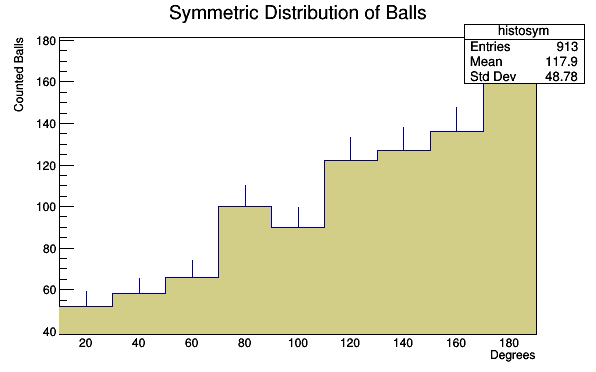

In [5]:
c2 = TCanvas( 'c2', 'Poisson Graph', 200, 10, 600, 400 ) 
histosym = TH1F("histosym", "Symmetric Distribution of Balls", 9, 10, 190) 

histosym.GetYaxis().SetTitle("Counted Balls")
histosym.GetXaxis ().SetTitle ("Degrees");

for data_point in datasym:
    histosym.Fill(data_point)
    
histosym.SetFillColor(41)
histosym.Draw("E")
histosym.Draw("same")
c2.Draw()

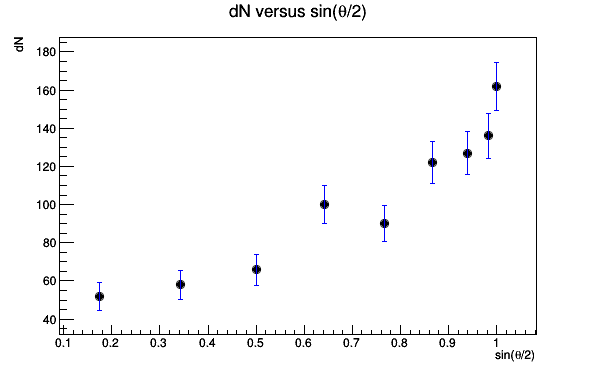

In [6]:
sin=array('f',sin)
ysym=array('f',ysym)
sysym=array('f',sysym)
ssin=array('f',ssin)
c3 = TCanvas( 'c3', '..', 200, 10, 600, 400 )
             
mygraph = TGraphErrors(len(ysym),sin,ysym,ssin,sysym)
mygraph.Draw("APE")
mygraph.SetTitle("dN versus sin(#theta/2)")
mygraph.SetLineColor( 4 )
mygraph.SetLineWidth( 1 )
mygraph.SetMarkerColor( 1 )
mygraph.SetMarkerStyle( 8 )

mygraph.GetXaxis().SetTitle( 'sin(#theta/2)' )
mygraph.GetYaxis().SetTitle( 'dN' )

c3.Draw()


****************************************
Minimizer is Linear
Chi2                      =      13.2511
NDf                       =            7
p0                        =      22.7228   +/-   7.0066      
p1                        =      111.865   +/-   10.7542     


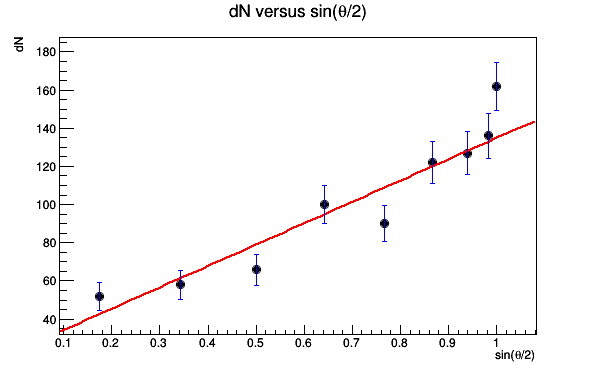

In [7]:
l1=TF1('l1','pol1')
mygraph.Fit(l1,'','')
c3.Draw()